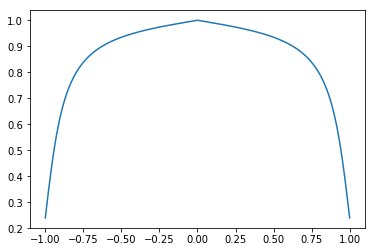

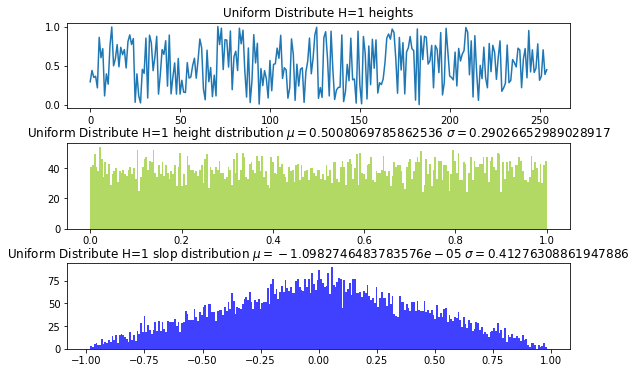

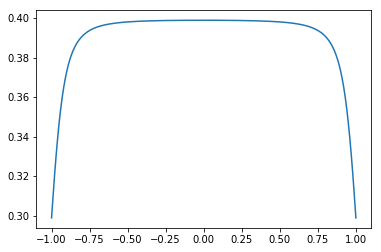

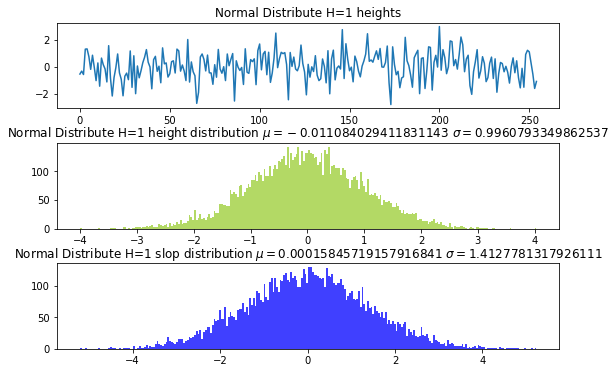

In [5]:
#!/usr/bin/python3

### 这段代码用来观察微表面理论

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline
 

#根据高度图求出Slope的函数
def GetSlope(H):
    #坡度为 H[n]-h[n-1]/(n-(n-1))
    #利用向量计算，分为两个向量，H0为[h[0],h[1],...h[n-1]] H1为[h[1],h[2],...h[n]]
    H0 = H[:-1]
    H1 = H[1:]

    #算坡度
    Slope = H1 - H0
    return Slope

#绘制直方图的代码修改自 https://www.jianshu.com/p/edf46a6c091b

def ShowHist(H, title):
    #概率分布直方图
    #高斯分布

    #首先随机
    
    #均值为0
    mean = 0

    #标准差为1，反应数据集中还是分散的值
    sigma = 1

    #x=mean+sigma*np.random.randn(10000)
    fig,(ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(9,6))

    #ax0为高度图
    ax0.plot(H[:255])
    ax0.set_title(title+" heights")

    #ax1为高度分布图
    #第二个参数是柱子宽一些还是窄一些，越大越窄越密
    ax1.hist(H,256,density=False,histtype='bar',facecolor='yellowgreen',alpha=0.75)

    ##pdf概率分布图，一万个数落在某个区间内的数有多少个
    ax1params = stats.norm.fit(H)
    ax1.set_title('{} height distribution $\mu={} \ \sigma={}$'.format(title, ax1params[0], ax1params[1]))

    #ax2为斜率分布图
    #cdf累计概率函数，cumulative累计。比如需要统计小于5的数的概率
    #ax2.hist(x,20,normed=1,histtype='bar',facecolor='pink',alpha=0.75,cumulative=True,rwidth=0.8)
    
    Slope = GetSlope(H);
    ax2.hist(Slope,256,histtype='bar',facecolor='blue',alpha=0.75,density=False)
    ax2params = stats.norm.fit(Slope)
    ax2.set_title('{} slop distribution $\mu={} \ \sigma={}$'.format(title, ax2params[0], ax2params[1]))
    fig.subplots_adjust(hspace=0.4)
    plt.show()

def ShowHeights(x, title):
    plt.title(title)
    plt.plot(x)
    plt.show()

def GetHalfVectorDistribution(x):
    #计算半角的分布
    eye_y = 0.1
    light_y=0.1
    Lo_x = -1 - x
    Lo_y = eye_y
    Li_x = 1 - x
    Li_y = light_y
    #单位方向
    Lo_len = np.sqrt(Lo_x*Lo_x+Lo_y*Lo_y)
    Lo_nx = Lo_x/Lo_len; 
    Lo_ny = Lo_y/Lo_len; 

    Li_len = np.sqrt(Li_x*Li_x+Li_y*Li_y)
    Li_nx = Li_x/Li_len; 
    Li_ny = Li_y/Li_len; 

    #半角向量
    H_x = (Li_nx + Lo_nx)/2.0
    H_y = (Li_ny + Lo_ny)/2.0

    #转换为和表面的夹角
    Theta = np.arctan2(H_y, H_x)
    #和法线的夹角,就是斜率
    NoH = np.abs(np.pi*0.5 - Theta)

    #拿这个斜率作为参数去斜率分布函数里找
    return NoH

## 1.假设微表面的高度图是平均分布
#首先我们随机生成微表面的高度图
#为了方便，高度符合

#微表面的高度范围
height = 1

#生成10000个数据
n=10000

#大写表示数组

#平均分布
#高度图
H = np.random.rand(n)*height

#斜率分布函数
D = GetSlope(H)

#对于平均分布，直方图为矩形，高为1/高度取值范围
D_h_theta = 1/height

#观察出来的，没有推导，考虑斜率分布是对称的，合并考虑应该是平均分布的，也算合理
#斜率概率密度函数为 y = D_h_theta - D_h_theta^2*|x| 
#已知概率密度f(x),和观察步长dx, 概率为定积分 F(x+dx)-F(x)
#假设表面范围为[-1,1], 眼睛在坐标(-1,1) 光源在坐标(1,1),考虑面上的点(x,0)
#出射方向Lo射向眼睛的方向为 眼睛-点 即(-1-x,1) 光源入射方向Li为(1-x,1) 半角H=0.5*(Li+Lo)
x = np.arange(-1,1.01,0.01)
NoH = GetHalfVectorDistribution(x)

#对于平均分布
#y = D_h_theta - D_h_theta^2*|x| 
#因二阶导数为0,又泰勒展开式可以估算对应范围的概率为 P(dx) = f(x) * dx
#平均分布不考虑mask函数，仅由法线分布可以得到的反射分布大概就是
#给定斜率下面朝半角的面占总的面数的概率密度函数为
D_func = D_h_theta - D_h_theta * D_h_theta * np.abs(NoH) 

#plt.plot(x,Theta)
#plt.plot(x,NoH)
plt.plot(x,D_func)
plt.show()
ShowHist(H, "Uniform Distribute H=1")

H = np.random.randn(10000)*height

#对于正态分布，dx所对应的样本数为 (norm.cdf(x+dx) - norm.cdf(x)) * n
#所以朝向为Theta的面所占的比重为
D_norm_func = stats.norm.pdf(NoH)

#plt.plot(x,NoH)
plt.plot(x,D_norm_func)
plt.show()

ShowHist(H, "Normal Distribute H=1")
